In [1]:
print("HI LETS GO")

HI LETS GO


In [2]:
import requests
from langchain.tools import tool
from langchain_community.utilities import SerpAPIWrapper, GoogleSerperAPIWrapper
from langgraph.graph import MessagesState,StateGraph,END,START
from langgraph.prebuilt import ToolNode,tools_condition
from typing import Union
from datetime import date,datetime
from pydantic import BaseModel
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from datetime import datetime
import requests


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
os.environ["SERP_API_KEY"]=os.getenv("SERP_API_KEY")
os.environ["OPENWEATHER_API_KEY"]=os.getenv("OPENWEATHER_API_KEY")
os.environ["tavily_api_key"]=os.getenv("tavily_api_key")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["EXCHANGE_API_KEY"] = os.getenv("EXCHANGE_RATE_API")
os.environ["SERPER_APIKEY"] = os.getenv("SERPER_APIKEY")

In [5]:
@tool
def current_weather(place:str):
    """Retrieves the current weather conditions for a specified location using SerpAPI.

    This tool performs a real-time Google search to obtain up-to-date weather 
    information such as temperature, humidity, wind, and general conditions 
    (e.g., sunny, cloudy, raining) for any given city, region, or country. It is 
    particularly useful for users planning travel, outdoor activities, or simply 
    checking the weather in another location.

    Parameters:
    - target_location (str): The name of the city, town, region, or country 
    for which the current weather data is to be fetched.

    Returns:
    - str: A string containing the current weather information as returned 
    by the search result."""

    gogglesearch=SerpAPIWrapper(serpapi_api_key=os.environ["SERP_API_KEY"])
    query=f"What is the current weather in {place}"
    curretweather=gogglesearch.run(query)
    return curretweather

In [7]:
res=current_weather("Delhi")


C:\Users\nagav\AppData\Local\Temp\ipykernel_24660\1457765472.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  res=current_weather("Delhi")


In [6]:
@tool
def weather_forcast(location:str,time:Union[str,date,datetime]):
    """
    Fetches the weather forecast for a given location and time using SerpAPI search results.

    Parameters:
        location (str): The name of the location for which the weather forecast is required.
        time (Union[str, date, datetime]): The time or date (as a string, date, or datetime object) for which the weather forecast is to be retrieved.

    Returns:
        str: The predicted weather conditions as retrieved from the search results.

    Note:
        This function constructs a natural language query and uses the SerpAPIWrapper to fetch weather predictions via a Google search.
    """
    query=(
        f"Detailed weather forecast for {location} on {time}, including temperature, chance of rain, "
        f"humidity, wind speed, UV index, sunrise and sunset times, and overall weather conditions"
    )
    search=SerpAPIWrapper(serpapi_api_key=os.environ["SERP_API_KEY"])
    prediction=search.run(query)
    return prediction

In [9]:


weather_forcast({"location": "Delhi", "time": datetime.now()})


'["Today\'s Weather in New Delhi: In New Delhi today, the weather is expected to be Fog with a maximum temperature of 36°C and a minimum of 29°C. Sunrise in New ...", \'Current New Delhi weather condition is Mist with real-time temperature (34°C), humidity 63%, wind 7.6km/h, pressure (1000mb), UV (4.9), visibility (5km) in ...\', \'Get the monthly weather forecast for Delhi, Delhi, India, including daily high/low, historical averages, to help you plan ahead ... Temperature Graph. °F.\', \'New Delhi Extended Forecast with high and low temperatures ... Rain showers. Cloudy. Feels Like: 104 °F. Humidity: 70%. Precipitation: Rain ...\', \'Mostly cloudy and humid; a little morning rain followed by a shower in spots in the afternoon. RealFeel®105°. RealFeel Shade™102°. Max UV Index11 (Extreme).\', \'Delhi Extended Forecast with high and low temperatures ... Rain showers. Cloudy. Feels Like: 103 °F. Humidity: 70%. Precipitation: Rain: ...\', \'LIGHT TO. MODERATE RAIN/ THUNDERSTORM/. LIGHTNING

In [7]:
@tool
def Hotelsearch(city:str,budget:int)->str:
    """
    search hotel in the city under the user budget
    Args:
        city: str (which city user want to travel)
        budget: int (how much money user want to pay for hotel)
    
    output: it will provide some hotel name and cost such as day or week or the hotel policy wise.
    
    
    """
    search=GoogleSerperAPIWrapper(serper_api_key=os.getenv("SERPER_APIKEY"))
    query=f"Best Hotel in {city} under ${budget}"
    res=search.run(query)
    return res


In [11]:
Hotelsearch({
    "city":"Chennai",
    "budget":200
})

'Cheap Hotels in Chennai (Madras) · 1. ibis Chennai Sipcot Hotel · 2. Taz Kamar Inn · 3. New Woodlands Hotel · 4. Green Meadows Resort · 5. Budget Hotels in Chennai · Showing Properties in Chennai. 4.2Very Good(2004 Ratings) · 3.7Very Good(1700 Ratings). Venture Park · 4.2Very Good(685 Ratings). Looking for Chennai Hotel? 2-star hotels from S$ 12, 3 stars from S$ 22 and 4 stars+ from S$ 21. Stay at Mallika Residency from S$ 20/night, S4 Residency ... Top rated cheap hotels in Chennai include ITC Grand Chola, a Luxury Collection Hotel, Chennai, HOTEL Akmg Towers and Taj Coromandel based on user reviews. Situated in the centre of Chennai, 1.8 km from Marina Beach, Super Hotel O Triplicane formerly Park Royal features air-conditioned rooms and free WiFi. Our top-rated cheap hotels in Chennai ; Taj Connemara, Chennai. 9 - Excellent ; The Accord Metropolitan. 8.7 - Excellent ; Hyatt Regency Chennai. 8.7 - Excellent ... Hablis Chennai Hotel · 8.0. Excellent ; MGM Beach Resort · 8.0. Excellen

In [8]:
#price=price per night
@tool
def hotelestimation(price:float,totaldays:int)->float:
    """
    Estimate total hotel cost based on price per night and number of days.
    
    price_per_night: float (description="Price per night of the selected hotel in USD")
    total_days: int (description="Total number of days the user will stay")

    """
    try:
        return round(price*totaldays,2)
    except Exception as e:
        return str(e)

In [13]:
hotelestimation.invoke({"price":645.54,"totaldays":5})

3227.7

In [9]:
@tool
def tourist_attraction(city:str)->str:
    """Search top tourist attractions in a given city.

    Args:
        city (str): Name of the city to search for tourist attractions.

    Returns:
        str: A list of top tourist attractions or places of interest.
    """
    search=TavilySearchResults(k=5)
    res=search.invoke(f"Top Tourist attractions in {city}.")
    attractions = [r["content"] for r in res if "content" in r]

    # Join them nicely
    return "\n\n---\n\n".join(attractions)

In [15]:
tourist_attraction("Delhi")

'*   [(Top)](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#)\n*   [1 Government buildings](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#Government_buildings)\n    \n*   [2 Connaught Place](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#Connaught_Place)\n    \n*   [3 Historic sites](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#Historic_sites) [...] *   [ISKCON Temple](https://en.wikipedia.org/wiki/ISKCON_Temple_Delhi "ISKCON Temple Delhi")\n*   [Jama Masjid](https://en.wikipedia.org/wiki/Jama_Masjid,_Delhi "Jama Masjid, Delhi")\n*   [Laxminarayan Temple](https://en.wikipedia.org/wiki/Laxminarayan_Temple "Laxminarayan Temple")\n*   [Lotus Temple](https://en.wikipedia.org/wiki/Lotus_Temple "Lotus Temple")\n*   [Nizamuddin Dargah](https://en.wikipedia.org/wiki/Nizamuddin_Dargah "Nizamuddin Dargah") [...] *   [Central Park (Sunder Nursery)](https://en.wikipedia.org/wiki/Sunder_Nursery "Sunder Nursery")\n*  

In [10]:
@tool
def restaurantsearch(city:str)->str:
    """
    Search the best restaurants in a given city.

    Args:
        city (str): Name of the city to search for restaurants.

    Returns:
        str: A list of popular restaurants to try.

    """
    search=TavilySearchResults(k=5)
    res=search.invoke(f"Best Restaurants to try in {city}.")
    attractions = [r["content"] for r in res if "content" in r]

    # Join them nicely
    return "\n\n---\n\n".join(attractions)


In [17]:
restaurantsearch("Chennai")

'Thuraipakkam](https://www.zomato.com/chennai/restaurants/in/park-plaza-omr-thuraipakkam)[The Residency Towers, T. Nagar](https://www.zomato.com/chennai/restaurants/in/the-residency-towers-t-nagar)[BKR Grand Hotel, T. Nagar](https://www.zomato.com/chennai/restaurants/in/bkr-grand-hotel-t-nagar)[ITC Grand Chola, Guindy](https://www.zomato.com/chennai/restaurants/in/itc-grand-chola)[Chennai Citi Centre, Mylapore](https://www.zomato.com/chennai/restaurants/in/chennai-citi-centre-mylapore)[Abirami [...] Thiruvanmiyur](https://www.zomato.com/chennai/restaurants/in/le-waterina-the-boutique-hotel-thiruvanmiyur)[Hilton Chennai, Guindy](https://www.zomato.com/chennai/restaurants/in/hilton-chennai-guindy)[Taj Coromandel, Nungambakkam](https://www.zomato.com/chennai/restaurants/in/taj-coromandel-hotel-nungambakkam)[The Savera Hotel, RK Salai (Cathedral Road)](https://www.zomato.com/chennai/restaurants/in/the-savera-hotel-dr-radhakrishnan-salai)[Ambassador Pallava, [...] Nungambakkam](https://www.

In [11]:
@tool
def activities(city:str)->str:
    """
    Search top activities to do in a city.
    Args:
        city(str):Name of the City to search for fun activities.
    Returns:
        str:A list of popular activities or experiences in the City.
    """
    search=TavilySearchResults(k=5)
    result=search.invoke(f"Fun activities to do in {city}")
    attractions = [r["content"] for r in result if "content" in r]

    # Join them nicely
    return "\n\n---\n\n".join(attractions)

In [12]:
@tool
def transportaion(city:str)->str:
    """
    Search tranportation options in a city.
    Agrs:
        city(str):Name of the City to search for transport details.
    Returns:
        str:Transportation options like bus,metro,taxi,and car rental.

    """
    search=TavilySearchResults(k=5)
    res=search.invoke(f"List of Transportation options in {city} for tourists")
    attractions = [r["content"] for r in res if "content" in r]

    # Join them nicely
    return "\n\n---\n\n".join(attractions)

In [20]:
transportaion("Chennai")

"The city has an extensive public transportation system of buses, overland trains, and a new subway. Buses, operated by Metropolitan Transport Corporation, can be crowded at busy times but they're a cheap and convenient way to get around the city. They cover over 622 routes each day and tourists can purchase daily or weekly passes for ₹50 or ₹300.\n\n### Taxi [...] The city has an extensive public transportation system of buses, overland trains, and a new subway. Buses, operated by Metropolitan Transport Corporation, can be crowded at busy times but they're a cheap and convenient way to get around the city. They cover over 622 routes each day and tourists can purchase daily or weekly passes for ₹50 or ₹300.\n\n### Taxi [...] Pre-paid taxis and minicabs can be found near all major tourist attractions and a five-mile journey typically costs ₹157 during the week. Auto-rickshaws are a cheaper alternative but be sure to check that the meter is working before you board. Fares start at ₹24 fo

In [13]:
##basecurr=base_currency,trgtcurr=target_currency
@tool 
def conversion_factor(basecurr:str,trgtcurr:str)->float:
    """
    Fetch the currency conversion rate between two currencies.

    Args:
        base_currency (str): The code of the base currency (e.g., 'USD').
        target_currency (str): The code of the currency to convert to (e.g., 'BDT').

    Returns:
        float: The conversion rate from base_currency to target_currency.
    """
    EXCHANGE_API_KEY=os.environ["EXCHANGE_RATE_API"]

    url = f'https://v6.exchangerate-api.com/v6/{EXCHANGE_API_KEY}/pair/{basecurr}/{trgtcurr}'

    # Making our request
    response = requests.get(url)
    data = response.json()
    if response.status_code==200 and data.get("conversion_rate"):
        return float(data["conversion_rate"])
    else:
        raise ValueError(f"Failed to get conversion rate :{data}")
    





In [14]:
@tool
def convert_currency(amount:float,conversion_rate:float)->float:
    """
    Convert an amount from base currency to target currency using a conversion rate.

    Args:
        amount (float): Amount in base currency.
        conversion_rate (float): Conversion rate to target currency.

    Returns:
        float: Amount in target currency.

    """
    return round(amount*conversion_rate,2)

In [15]:
@tool
def add(a:float,b:float)->float:
    """
    Add Two numbers.
    Args:
        a (float): First number.
        b (float): Second number.

    Returns:
        float: The sum of a and b.
    """
    return round(a+b,2)

In [16]:
@tool
def multiply(a:float,b:float)->float:
    """
    multiply Two numbers.
    Args:
        a (float): First number.
        b (float): Second number.

    Returns:
        float: The sum of a and b.
    """
    return round(a*b,2)

In [17]:
@tool
def calculate_total(hotel_cost:float,activity_cost:float,transport_cost:float)->float:
    """
    Calculate the total cost of the trip.

    Args:
        hotel_cost (float): Total hotel cost.
        activity_cost (float): Total activity/entertainment cost.
        transport_cost (float): Total transportation cost.

    Returns:
        float: Combined total trip cost.
    """
    return round(hotel_cost+activity_cost+transport_cost,2)

In [18]:
@tool
def daily_budget(total_cost: float, days: int) -> float:
    """
    Calculate daily budget based on total cost and number of days.

    Args:
        total_cost (float): Total expense for the trip.
        days (int): Total number of travel days.

    Returns:
        float: Estimated daily budget.
    """
    if days <= 0:
       raise ValueError("Days must be greater than zero.")
    return round(total_cost / days, 2)

In [19]:
SYSTEM_PROMPT="""
You are an AI Travel Agent & Expense Planner. Your job is to help users plan their trips to any city in the world using real-time data and intelligent tools.

You must:
1. Understand the user's travel intent (destination, duration, interests).
2. Decide which tools to call and in what order based on the request.
3. Use tools to fetch:
   - Real-time weather (current or forecast)
   - Local attractions, restaurants, activities, transportation
   - Hotel options and estimate total hotel cost
   - Add or multiply costs to calculate total and daily budget
   - Convert total cost to user's currency using real-time exchange rate
   - Generate a day-by-day itinerary
   - Generate a final summary of the full trip plan

Available tools:
- `current_weather`: Get today's weather for a city.
- `weather_forcast`: Get multi-day forecast for a city.
- `Hotelsearch`: Find hotels in a city.
- `hotelestimation`: Estimate total hotel cost from daily rate and number of days.
- `tourist_attraction`: Find popular tourist spots.
- `restaurantsearch`: Find popular local restaurants.
- `activities`: Find local activities (tours, events, etc.).
- `transportaion`: List available transportation options.
- `add`: Add multiple cost values.
- `multiply`: Multiply values (e.g., cost per day × days).
- `calculate_total`: Aggregate final trip cost.
- `conversion_factor`: Get real-time exchange rate.
- `convert_currency`: Convert final trip cost to user's native currency.

Instructions:
- Select tools one at a time based on user input and context.
- Use memory to store important variables like destination, duration, cost breakdowns, currency, etc.
- Once all data is gathered, generate a full day-by-day itinerary.
- Summarize the travel plan including location, dates, weather, top places, cost in native currency, and a final recommendation.

End Goal:
Return a **complete travel plan** including:
- Weather conditions
- Recommended attractions, activities, and restaurants
- Hotel options and total cost
- Currency conversion and daily/total budget
- Day-wise itinerary
- Final natural language summary

Be informative, helpful, and always rely on tools for real-time or factual data.
"""

In [20]:
tools=[
    current_weather,
    weather_forcast,
    Hotelsearch,
    hotelestimation,
    tourist_attraction,
    restaurantsearch,
    activities,
    transportaion,
    conversion_factor,
    convert_currency,
    add,
    multiply,
    calculate_total
]

In [21]:
llm=ChatGroq(model="qwen/qwen3-32b")

In [24]:
llm.invoke("HI Tell me about Robert Downey Jr")

AIMessage(content='<think>\nOkay, I need to tell the user about Robert Downey Jr. Let me start by recalling what I know about him. He\'s an actor, right? Well-known for his roles in Marvel movies, especially Iron Man and Sherlock Holmes. But there\'s more to him than just those roles. I remember he had some personal struggles with addiction in the past, but he turned his life around.\n\nFirst, I should mention his early career. He started acting as a kid in the 80s, maybe in movies like "Back to School" or "Less Than Zero." Then he had a breakout role in "Chaplin" with his father. Wait, his father is also an actor, Robert Downey Sr. So that\'s a point to note.\n\nHe became a Hollywood A-lister in the 90s with movies like "Airborne" and "The Firm." But then his substance abuse issues started affecting his career. He went through rehab multiple times. I think he was arrested for drug use in the mid-90s. That period must have been tough on him and his career.\n\nThen came the redemption p

In [25]:
llm_with_tools=llm.bind_tools(tools)

In [26]:
llm_with_tools.invoke(
    "Hi, I want to take a 5-day trip to London next month. My hotel budget is around $100 per night. I would like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I will be paying in INR . Also, I prefer local food and public transportation. Can you plan it all for me?"
    )

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'krhptnrq7', 'function': {'arguments': '{"basecurr":"USD","trgtcurr":"INR"}', 'name': 'conversion_factor'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 1489, 'prompt_tokens': 914, 'total_tokens': 2403, 'completion_time': 3.182437968, 'prompt_time': 0.050463697, 'queue_time': 0.057663113, 'total_time': 3.232901665}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ce7842f2-9bf3-4dc1-8990-a0526396a096-0', tool_calls=[{'name': 'conversion_factor', 'args': {'basecurr': 'USD', 'trgtcurr': 'INR'}, 'id': 'krhptnrq7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 914, 'output_tokens': 1489, 'total_tokens': 2403})

In [27]:
def call_model(state:MessagesState):
    question=state["messages"]
    questionwithsystemprompt=[SYSTEM_PROMPT]+question
    response=llm_with_tools.invoke(questionwithsystemprompt)
    return {
        "messages":[response]
    }


In [28]:
workflow=StateGraph(MessagesState)
workflow.add_node("llm_decision_step",call_model)
workflow.add_node("tools",ToolNode(tools))
workflow.add_edge(START,"llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition
)
workflow.add_edge("tools","llm_decision_step")
TRAVEL_AGENT=workflow.compile()

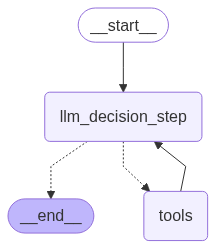

In [29]:
TRAVEL_AGENT

In [30]:
input = "Hi, I want to take a 5-day trip to London next month. My hotel budget is around $100 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in INR . Also, I prefer local food and public transportation. Can you plan it all for me?"


In [31]:
output = TRAVEL_AGENT.invoke(
    {
        "messages": [input]
    }
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I want to take a 5-day trip to London next month. My hotel budget is around $100 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in INR . Also, I prefer local food and public transportation. Can you plan it all for me?
================================== Ai Message ==================================
Tool Calls:
  current_weather (788cve2yw)
 Call ID: 788cve2yw
  Args:
    place: London
================================= Tool Message =================================
Name: current_weather

{'type': 'weather_result', 'temperature': '62', 'unit': 'Fahrenheit', 'precipitation': '0%', 'humidity': '69%', 'wind': '12 mph', 'location': 'London, UK', 'date': 'Monday 6:00 AM', 'weather': 'Partly cloudy'}
================================== Ai Message ==================================
Tool Calls:
  Hotelsearch (tg6st1zz5)
 C

In [32]:
from IPython.display import Markdown

Markdown(output["messages"][-1].content)

### 🌍 5-Day London Travel Plan (INR Conversion: ₹86.67 per $1)

---

#### **Weather Overview**  
**Current Conditions**:  
- 🌤️ Partly cloudy, 62°F (17°C)  
- 💧 0% precipitation, 69% humidity  
- 🌬️ Wind: 12 mph  

**Forecast**: *Will check for 5-day forecast if needed (weather_forcast tool pending)*.

---

#### **Accommodation**  
**Recommended Budget Hotels** (under $100/night):  
1. **YHA London Earl's Court** (Hostel) – $60/night  
2. **Mama Shelter London** – $95/night  
3. **Travelodge Central London** – $75/night  

**Total Hotel Cost**:  
- **$400** (5 nights at $80/night)  
- **₹34,667** (converted to INR).

---

#### **Top Attractions**  
1. **Tower of London** (Historic castle, Crown Jewels)  
2. **British Museum** (Free entry, global artifacts)  
3. **Hyde Park** (Serpentine Lake, Speakers' Corner)  
4. **Westminster Abbey** (Architectural marvel)  
5. **London Eye** (Panoramic views)  

**Free Activities**:  
- Stroll through **Camden Market** (local food & crafts).  
- Visit **Tate Modern** (free art exhibitions).  

---

#### **Local Food Picks**  
1. **The Spice Indian Restaurant** (Authentic Indian cuisine).  
2. **Normah’s** (Malaysian comfort food).  
3. **Devine Restaurant Coffee Bar** (International dishes).  

**Budget Tip**: Use the [Oyster Card](https://tfl.gov.uk/modes/using-public-transport/credit-or-debit-cards) for seamless public transport.  

---

#### **Transportation Options**  
- **Tube**: £2.70 per ride (zones 1-2).  
- **Elizabeth Line**: Faster cross-city travel.  
- **River Bus**: Scenic Thames tours (£13+).  

**Recommended Pass**:  
- **7-Day Travelcard** (£58.80) – Unlimited travel in zones 1-2.  

---

#### **Activities & Excursions**  
1. **Boat Trip** (Little Venice to Camden Market) – £13.  
2. **Go-Karting** at Canary Wharf – £38.  
3. **Wakeboarding** on the Thames – £45/group.  

---

#### **Budget Breakdown**  
| **Category**         | **Cost (USD)** | **Cost (INR)** |  
|----------------------|----------------|----------------|  
| Hotel (5 nights)     | $400           | ₹34,667        |  
| Food (5 days)        | $150           | ₹13,000        |  
| Transport (7-Day)    | $50            | ₹4,333         |  
| Activities (3 picks) | $90            | ₹7,800         |  
| **Total**            | **$700**       | **₹60,000**    |  

---

#### **Day-by-Day Itinerary**  
**Day 1**:  
- Arrival, check-in at hotel.  
- Explore **Covent Garden** (shops, street performers).  
- Dinner at **The Spice Indian Restaurant**.  

**Day 2**:  
- **Tower of London** & **Tower Bridge**.  
- Afternoon at **St. Katharine Docks** (markets).  
- Evening Thames River Cruise.  

**Day 3**:  
- **British Museum** + **Fitzwilliam Museum**.  
- **Camden Market** for lunch and shopping.  

**Day 4**:  
- **Westminster Abbey** & **Big Ben**.  
- **Hyde Park** stroll + Serpentine Lake.  

**Day 5**:  
- **London Eye** & **South Bank Walk**.  
- Departure.  

---

#### **Final Recommendations**  
- **Best Time to Visit**: April-September for mild weather.  
- **Currency Tip**: Use contactless payment or Oyster card for ease.  
- **Hidden Gem**: **Kensington Palace** (lesser-crowded alternative to Buckingham Palace).  

Enjoy your trip! Let me know if you’d like a detailed itinerary PDF or further adjustments. 😊